In [2]:
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
  Using ca

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input

In [12]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv("preprocessed_data.csv")

In [13]:
# Chọn các đặc trưng và nhãn
X = data[['size', 'rooms', 'category_name', 'area_name']]
y = data['price']

In [14]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Xây dựng mô hình mạng nơ-ron
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [17]:
# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Huấn luyện mô hình và lưu lại lịch sử huấn luyện
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 28066542828935708672.0000 - val_loss: 26939543410465308672.0000
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26263220614080757760.0000 - val_loss: 26939536813395542016.0000
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27215934245409128448.0000 - val_loss: 26939506027069964288.0000
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27617069072570646528.0000 - val_loss: 26939459847581597696.0000
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27924136281929416704.0000 - val_loss: 26939407071023464448.0000
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26547972135442186240.0000 - val_loss: 26939305915953709056.0000
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26580359349949956096.0000 - val_loss: 26939187168697909248.0000
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28076361467771748352.0000 - val_loss: 26939024440976998400.0000


In [19]:
# Đánh giá mô hình
loss = model.evaluate(X_test_scaled, y_test)
print(f'Model Loss: {loss}')

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 27342362689440579584.0000
Model Loss: 2.7403495535944925e+19


In [25]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Tính toán các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step
Mean Absolute Error (MAE): 3851285514.08005
Mean Squared Error (MSE): 2.740349293767596e+19
Mean Absolute Percentage Error (MAPE): 0.9925059728944297


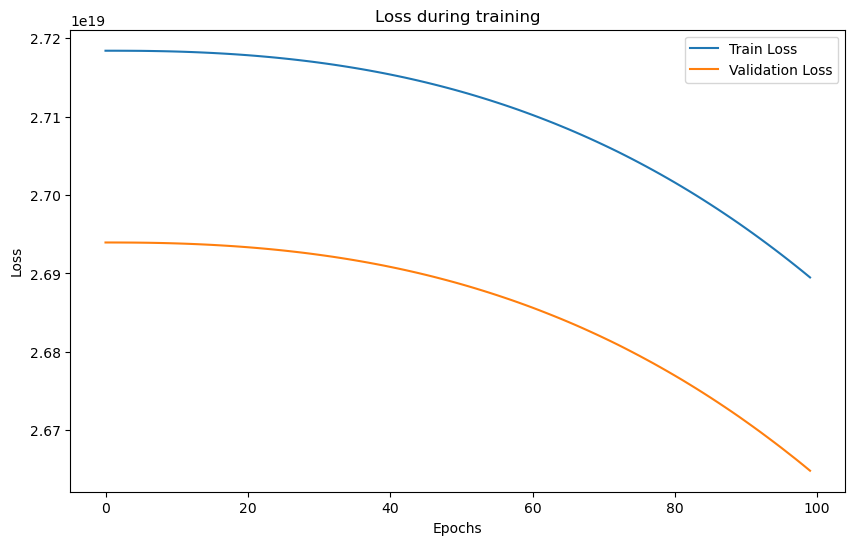

In [26]:
# Trực quan hóa quá trình huấn luyện (loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.legend()
plt.show()

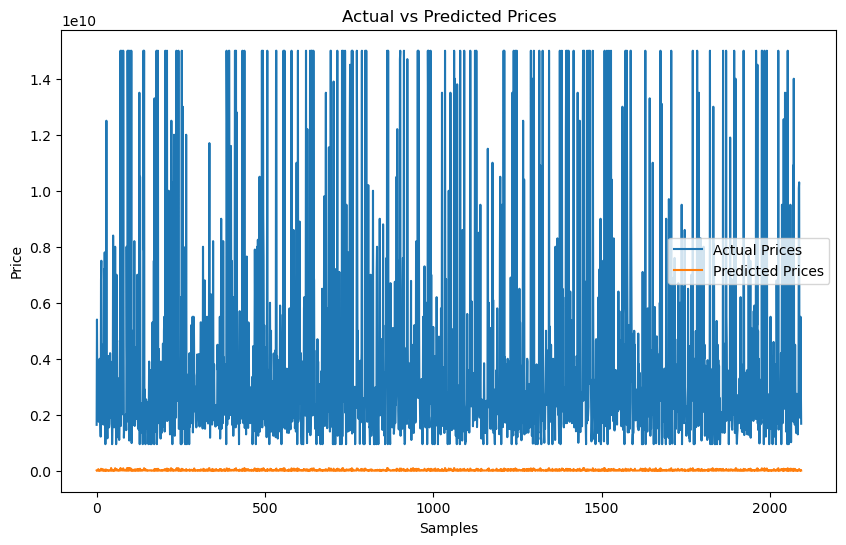

In [27]:
# Trực quan hóa giá trị thực và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

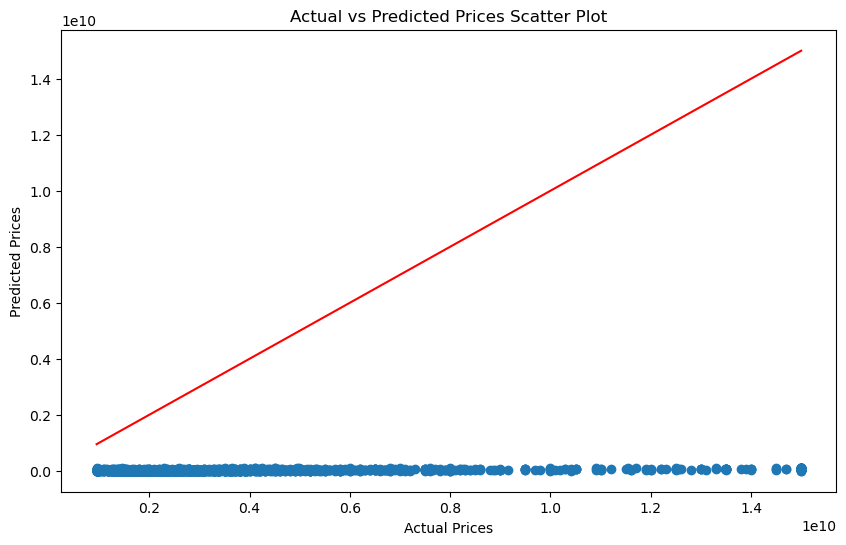

In [28]:
# Biểu đồ phân tán của giá trị thực và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices Scatter Plot')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Đường y=x
plt.show()